# 회귀분석이란?
 ## 1. 키와 발 크기간의 관계

1885년 영국의 유전학자 골턴(F. Galton)은 부모의 키가 매우 크면(혹은 매우 작으면) 일반적으로 자녀의 키는 평균보다는 크지만(작지만) 부모보다는 작다(크다)고 분석하며
 ‘키는 평균으로 회귀한다’는 말을 했다

유전적인 요소 이외에 우리가 키와 상관있다고 생각하는 것이 발 크기이다.
 과연 키가 크면 발도 클까?

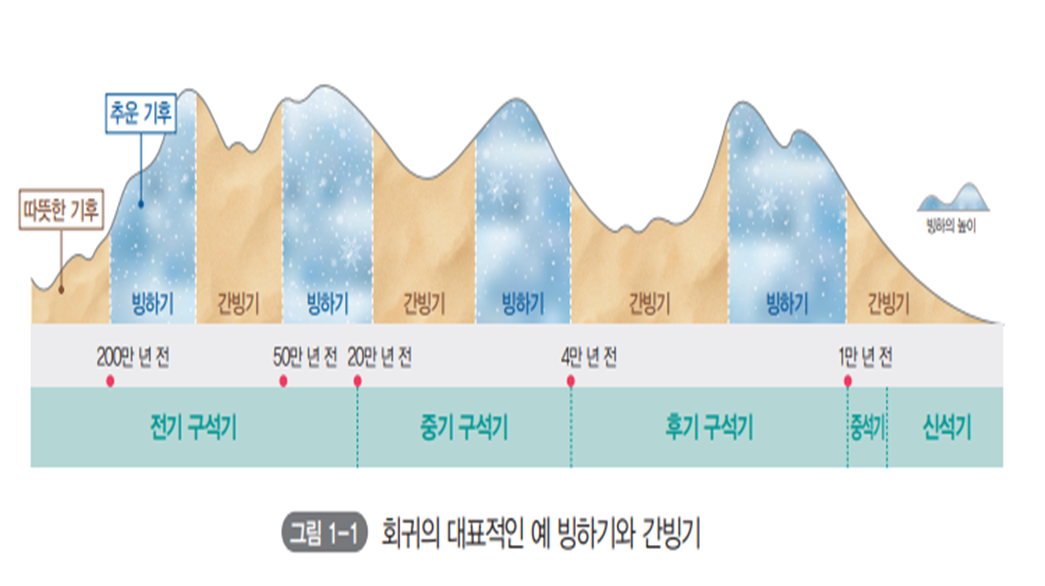

# 1)초기 설정
- 머신러닝 모델을 만들기 전에 필요한 설정
- 데이터 처리를 위한 Numpy, pandas, Matplotlib을 불러온다


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 2) 데이터 불러오기
- 키와 발 크기 데이터 불러오기
- 아래와 같이 코드를 입력 하고 크기 혹은 데이터 개수를 파악할 수 있는 len(  )로 출력하면 
    총 15개의 키와 발 크기 데이터를 불러올 수 있다.
- 데이터 불러오기가 잘 되었는지 확인해보자 
        -> 15명의 키와 발크기 데이터


In [ ]:
height = [155.3,157.5,156.5,163.9,169.3,170.5,195.5,175.1,173.8,177.7,182.6,180.7,186.7,189.9,189.2]
foot_size = [220,230,235,240,245,250,255,260,265,270,275,280,285,290,300]
print(len(foot_size), len(height))

15 15


## 데이터 그래프로 시각화 하기

- 불러온 데이터를 한눈에 보고 싶으면 데이터 시각화를 진행하면 된다. 
- scatter(  ) 함수 안에 발 크기(x축)와 키(y축) 데이터를 넣고 show(  ) 함수를 호출하면 산점도 그래프(도표 위에 X와 Y 값이 만나는 지점을 표시한 점 그래프)가 나온다. 

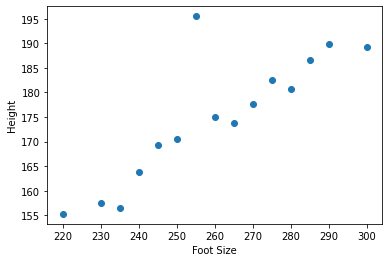

In [ ]:
plt.scatter(foot_size, height)
plt.xlabel('Foot Size')
plt.ylabel('Height')
plt.show()

# 3) 데이터 전처리하기
- 데이터를 불러왔으니 머신러닝 알고리즘으로 학습하기 알맞게 전처리 필요
- 그래프를 살펴 보면 한 데이터가 다른 데이터에 비해 유독 벗어난 것을 ‘극단치’ 라고 한다.
- 이러한 비정상적인 데이터를 처리해야 인공지능 모델의 정확도를 높일 수 있다.
- 극단치를 제거하기 위해 해당 데이터 순번을 파악할 필요가 있음.
- 키가 195가 넘는 데이터는 일 곱 번째 데이터
따라서 [코드 1-3]과 같이 각 데이터의 0번부터 6번 미만까지와 7번부터 15번 미만까지 데이터를 더해주면 극단치인 6번 데이터가 제거된다.


In [ ]:
foot_size = foot_size[0:6] + foot_size[7:15]
height = height[0:6] + height[7:15]

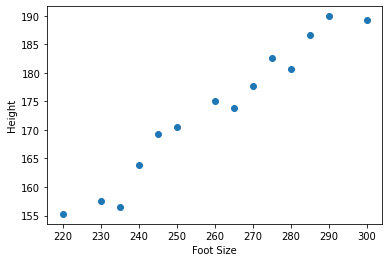

In [ ]:
#극단치가 제거된 데이터 그래프로 시각화하기
plt.scatter(foot_size, height)
plt.xlabel('Foot Size')
plt.ylabel('Height')
plt.show()

# 4) 회귀와 최소 제곱법 구현
- https://terms.naver.com/entry.nhn?docId=3569970&cid=58944&categoryId=58970
- 예측함수 y =ax + b
- 오차는 yi-f(xi)를 최소화하는 것이 좋으며, 이를 위해 최소제곱법 1~n의합(yi-f(xi)^2 = (yi - (axi+b))^2이 되며
- 손실함수의 최소값은 편미분이 0이므로 a, b에 대한 편미분을 실시하면
- 단, xm, ym은 xi, yi들의 평균값이다.

![a, b의 손실함수](https://ncc-phinf.pstatic.net/20130312_19/yksysh_1363052767956xl10F_JPEG/%BF%B9%C0%FC%C4%C1%C5%D9%C3%F7-%BC%F6%C1%A4.jpg?type=w646)


- 넘파이 배열로 키와 발 크기 데이터를 변환해서 불러온다.

In [ ]:
x = np.array(foot_size)
y = np.array(height)

## 최소제곱법 구현
- a(기울기)의 분자를 먼저 구현해 보자. ∑는 합을 나타내므로 넘파이 모듈의 sum(  ) 함수를, 𝑥 ̅ 와 𝑦 ̅  는 각각 x와 y의 평균을 나타내므로 mean(  ) 함수를 사용
- 제곱은 곱하기를 두 번(**) 해 주면 되므로 a(기울기)의 분모는 [코드 1-5] 두 번째 줄과 같이 구하고 a를 나누어 주면 구현할 수 있다.
-  b(절편)는 [수식 1-1] 오른쪽처럼 y의 평균에서 a(기울기)를 곱한 x의 평균을 빼면 되므로 [코드 1-5] 세 번째 줄과 같다.

In [ ]:
a = np.sum((y-np.mean(y))*(x-np.mean(x))) #a(기울기)의 분자
a = a/np.sum((x-np.mean(x))**2) #a(기울기)의 분모를 구현하고 분자로 나눈다
b = np.mean(y) - a*np.mean(x) #b(절편)
print('a(기울기):', a, 'b(절편):',b)

a(기울기): 0.4780531791907514 b(절편): 49.01401156069366


## 회귀선 구하기
- 키와 발 크기 데이터의 최소제곱법 결과 기울기는 약 0.478 정도이고 절편은 약 49가 나왔다. 이를 시각화하여 한눈에 확인해 보자
- 우선 x(발 크기)의 최솟값과 최댓값 사이에 있는 점들의 집합을 우리가 구한 직선에 대입하기
- 첫 번 째 줄은 x(발 크기)의 최솟값과 최댓값 사이에 수를 1cm 간격으로 line_x에 저장
두 번째 줄은 line_x의 데이터를 우리가 구한 직선에 대입해서 그 값을 line_y에 저장

In [ ]:
line_x = np.arange(min(x), max(x), 1)
line_y = a*line_x+b

## 회귀선 시각화
- line_x와 line_y 산점도 추가
- 구별을 위해 빨간색으로 선 색을 바꾸어 주면 키와 발 크기 데이터와 회귀선이 나타남.
        -> ‘발 크기가 클수록 키가 크다’는 상관관계를 알 수 있다


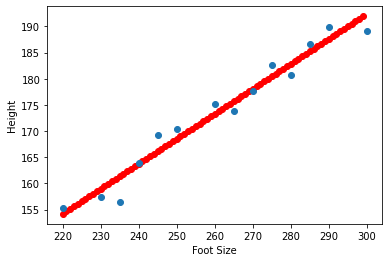

In [ ]:
#그래프 그리기Ⅰ
plt.scatter(line_x, line_y, color='r')
plt.scatter(x,y)
plt.xlabel('Foot Size')
plt.ylabel('Height')
plt.show()

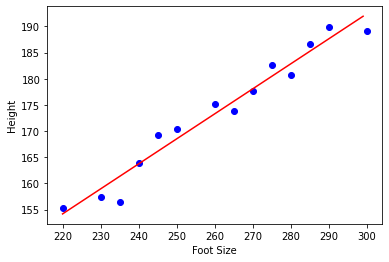

In [ ]:
#그래프 그리기Ⅱ
plt.plot(line_x, line_y, c='r')
plt.scatter(x,y, c='b')
plt.xlabel('Foot Size')
plt.ylabel('Height')
plt.show()